In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
import os.path as path
import os
from Bio import SeqIO # some BioPython that will come in handy

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean

import seaborn as sns

import itertools
from itertools import product
import timeit


print("done")

done


In [2]:
sequences2 = np.load('/Variant Classification/Data Processing/sequences.npy',allow_pickle=True)
attributes = np.load('/Variant Classification/Data Processing/attributes.npy',allow_pickle=True)

In [3]:
variants_name = attributes[:]

In [4]:
len(variants_name), len(sequences2)

(910, 910)

In [5]:
cc = []
for i in range(len(sequences2)):
#     aa = encoded_sequences[i]
    cc.append(len(sequences2[i]))

In [6]:
np.unique(cc), min(cc), max(cc)

(array([29719, 29739, 29745, 29792, 29798, 29807, 29811, 29815, 29817,
        29819, 29829, 29830, 29831, 29833, 29834, 29837, 29838, 29839,
        29840, 29842, 29843, 29846, 29847, 29848, 29849, 29851, 29855,
        29856, 29857, 29858, 29859, 29860, 29861, 29862, 29864, 29865,
        29866, 29867, 29869, 29870, 29871, 29872, 29873, 29875, 29877,
        29879, 29880, 29881, 29882, 29883, 29884, 29885, 29886, 29887,
        29888, 29889, 29890, 29891, 29892, 29893, 29894, 29895, 29896,
        29897, 29898, 29899, 29900, 29901, 29902, 29903, 29904, 29905,
        29906, 29908, 29909, 29912]),
 29719,
 29912)

In [7]:
seq3 = []
for i in range(len(sequences2)):
    tmp = sequences2[i]
    seq3.append(tmp[0:29719])

In [8]:
cc = []
for i in range(len(seq3)):
#     aa = encoded_sequences[i]
    cc.append(len(seq3[i]))

In [9]:
np.unique(cc), min(cc), max(cc)

(array([29719]), 29719, 29719)

In [10]:
# We create a class fasta_sequence so that we would be able to use the sequence data easily 

class fasta_sequence:
    def __init__(self, sequence, type_of_encoding = "onehot"):
        
        # we read the input data
        
        self.sequence = sequence


        def encoding(sequence, type_of_encoding):

            # define universe of possible input values
#             alphabet = 'ABCDEFGHIJKLMNPQRSTUVWXYZ-'
            alphabet = 'ABCDEFGHIJKLMNPQRSTVWXYZ-'
            # define a mapping of chars to integers
            char_to_int = dict((c, i) for i, c in enumerate(alphabet))


            # integer encoding
            integer_encoded = [char_to_int[char] for char in sequence]

            # one-hot encoding
            onehot_encoded = list()
            for value in integer_encoded:
                letter = [0 for _ in range(len(alphabet)-1)]
                if value != len(alphabet)-1:
                    letter[value] = 1
                onehot_encoded.append(letter)
            flat_list = [item for sublist in onehot_encoded for item in sublist]

            if type_of_encoding == "onehot":
                return flat_list
            else:
                return integer_encoded
            
        #  we use the encoding function to create a new attribute for the sequence -- its encoding        
        self.encoded = encoding(sequence, type_of_encoding)
        
print("done")

done


In [12]:
# we create a list of sequences as objects of the class fasta_sequence
# all sequences are encoded with one-hot encoding (it is the default option of the constructor of the class)
prot_seq = seq3[:]
sequences = []
start = timeit.default_timer()
for i in range(0, len(prot_seq)):
    current_sequence = fasta_sequence(prot_seq[i])
    sequences.append(current_sequence)

stop = timeit.default_timer()
print("One Hot Encoding time : ", stop - start) 

print("done")

One Hot Encoding time :  327.2908047
done


In [13]:
# for a list of sequences, returns a list of encoded sequences and a list of targets

def EncodeAndTarget(list_of_sequences):
    # encoding the sequences
    list_of_encoded_sequences = [entry.encoded for entry in list_of_sequences]
    return list_of_encoded_sequences   



In [14]:
start = timeit.default_timer()

encoded_sequences = EncodeAndTarget(sequences)
stop = timeit.default_timer()
print("Merge Seq an Target : ", stop - start) 

Merge Seq an Target :  0.00024580000001606095


In [15]:
len(encoded_sequences[0]),len(encoded_sequences),type(encoded_sequences),type(encoded_sequences[0])

(713256, 910, list, list)

In [16]:
cc = []
for i in range(len(encoded_sequences)):
    aa = encoded_sequences[i]
    cc.append(sum(aa))

In [17]:
np.unique(cc)

array([29719])

In [18]:
pd.DataFrame(aa).isnull().values.any()

False

In [19]:
len(np.unique(attributes))

115

# Classification Functions

In [59]:
# In[4]
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
    
    
    check = pd.DataFrame(roc_auc_dict.items())
    return mean(check)

def svm_fun_kernel(X_train,y_train,X_test,y_test,kernel_mat):

#     clf = svm.SVC()
    clf = svm.SVC(kernel=kernel_mat)
    
    #Train the model using the training sets
    clf.fit(kernel_mat, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    svm_acc = metrics.accuracy_score(y_test, y_pred)
#     print("SVM Accuracy:",svm_acc)
    
    svm_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("SVM Precision:",svm_prec)
    
    svm_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("SVM Recall:",svm_recall)

    svm_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("SVM F1 Weighted:",svm_f1_weighted)
    
    svm_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("SVM F1 macro:",svm_f1_macro)
    
    svm_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("SVM F1 micro:",svm_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix SVM : \n", confuse)
    print("SVM Kernel Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
#    print(macro_roc_auc_ovo[1])
    check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,svm_f1_micro,macro_roc_auc_ovo[1]]
    
    
    fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#     sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

    a = confuse[:]
    sns.set(rc = {'figure.figsize':(6,6)})
    sns.set(font_scale=1.6)
    sns.heatmap(a/np.sum(a,axis=1), annot=True,  square=True, cmap = sns.color_palette("rocket", as_cmap=True))
    
    plt.savefig('kernel.png')
    plt.show()   
    return(check)

# In[5]
##########################  SVM Classifier  ################################
def svm_fun(X_train,y_train,X_test,y_test):
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    svm_acc = metrics.accuracy_score(y_test, y_pred)
#     print("SVM Accuracy:",svm_acc)
    
    svm_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("SVM Precision:",svm_prec)
    
    svm_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("SVM Recall:",svm_recall)

    svm_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("SVM F1 Weighted:",svm_f1_weighted)
    
    svm_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("SVM F1 macro:",svm_f1_macro)
    
    svm_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("SVM F1 micro:",svm_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix SVM : \n", confuse)
    print("SVM Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
#    print(macro_roc_auc_ovo[1])
    check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,svm_f1_micro,macro_roc_auc_ovo[1]]
    
    a = confuse[:]
    sns.set(rc = {'figure.figsize':(6,6)})
    sns.set(font_scale=1.6)
    sns.heatmap(a/np.sum(a,axis=1), annot=True,  square=True, cmap = sns.color_palette("rocket", as_cmap=True))
    
    plt.savefig('Heatmap_SVM.png')
    plt.show()  
        
    return(check)
    


# In[5]
##########################  NB Classifier  ################################
def gaus_nb_fun(X_train,y_train,X_test,y_test):
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)


    NB_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Gaussian NB Accuracy:",NB_acc)

    NB_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB Precision:",NB_prec)
    
    NB_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB Recall:",NB_recall)
    
    NB_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB F1 weighted:",NB_f1_weighted)
    
    NB_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Gaussian NB F1 macro:",NB_f1_macro)
    
    NB_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Gaussian NB F1 micro:",NB_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix NB : \n", confuse)
    print("NB Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    check = [NB_acc,NB_prec,NB_recall,NB_f1_weighted,NB_f1_macro,NB_f1_micro,macro_roc_auc_ovo[1]]
    
    a = confuse[:]
    sns.set(rc = {'figure.figsize':(6,6)})
    sns.set(font_scale=1.6)
    sns.heatmap(a/np.sum(a,axis=1), annot=True,  square=True, cmap = sns.color_palette("rocket", as_cmap=True))
    
    plt.savefig('Heatmap_NB.png')
    plt.show()    
    return(check)

# In[5]
##########################  MLP Classifier  ################################
def mlp_fun(X_train,y_train,X_test,y_test):
    # Feature scaling
    scaler = StandardScaler()  
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)  
    X_test_2 = scaler.transform(X_test)


    # Finally for the MLP- Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
    mlp.fit(X_train, y_train)


    y_pred = mlp.predict(X_test_2)
    
    MLP_acc = metrics.accuracy_score(y_test, y_pred)
#     print("MLP Accuracy:",MLP_acc)
    
    MLP_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("MLP Precision:",MLP_prec)
    
    MLP_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("MLP Recall:",MLP_recall)
    
    MLP_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("MLP F1:",MLP_f1_weighted)
    
    MLP_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("MLP F1:",MLP_f1_macro)
    
    MLP_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("MLP F1:",MLP_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix MLP : \n", confuse)
    print("MLP Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [MLP_acc,MLP_prec,MLP_recall,MLP_f1_weighted,MLP_f1_macro,MLP_f1_micro,macro_roc_auc_ovo[1]]
    
    a = confuse[:]
    sns.set(rc = {'figure.figsize':(6,6)})
    sns.set(font_scale=1.6)
    sns.heatmap(a/np.sum(a,axis=1), annot=True,  square=True, cmap = sns.color_palette("rocket", as_cmap=True))
    
    plt.savefig('Heatmap_MLP.png')
    plt.show()

    return(check)

# In[5]
##########################  knn Classifier  ################################
def knn_fun(X_train,y_train,X_test,y_test):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    knn_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Knn Accuracy:",knn_acc)
    
    knn_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Knn Precision:",knn_prec)
    
    knn_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Knn Recall:",knn_recall)
    
    knn_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Knn F1 weighted:",knn_f1_weighted)
    
    knn_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Knn F1 macro:",knn_f1_macro)
    
    knn_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Knn F1 micro:",knn_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix KNN : \n", confuse)
    print("KNN Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [knn_acc,knn_prec,knn_recall,knn_f1_weighted,knn_f1_macro,knn_f1_micro,macro_roc_auc_ovo[1]]
    
    a = confuse[:]
    sns.set(rc = {'figure.figsize':(6,6)})
    sns.set(font_scale=1.6)
    sns.heatmap(a/np.sum(a,axis=1), annot=True,  square=True, cmap = sns.color_palette("rocket", as_cmap=True))
    plt.savefig('Heatmap_KNN.png')
    plt.show()  
    return(check)

# In[5]
##########################  Random Forest Classifier  ################################
def rf_fun(X_train,y_train,X_test,y_test):
    # Import the model we are using
    from sklearn.ensemble import RandomForestClassifier
    # Instantiate model with 1000 decision trees
    rf = RandomForestClassifier(n_estimators = 100)
    # Train the model on training data
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    fr_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Random Forest Accuracy:",fr_acc)
    
    fr_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Random Forest Precision:",fr_prec)
    
    fr_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Random Forest Recall:",fr_recall)
    
    fr_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Random Forest F1 weighted:",fr_f1_weighted)
    
    fr_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Random Forest F1 macro:",fr_f1_macro)
    
    fr_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Random Forest F1 micro:",fr_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix RF : \n", confuse)
    print("RF Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [fr_acc,fr_prec,fr_recall,fr_f1_weighted,fr_f1_macro,fr_f1_micro,macro_roc_auc_ovo[1]]
    
    a = confuse[:]
    sns.set(rc = {'figure.figsize':(6,6)})
    sns.set(font_scale=1.6)
    sns.heatmap(a/np.sum(a,axis=1), annot=True,  square=True, cmap = sns.color_palette("rocket", as_cmap=True))
    
    plt.savefig('Heatmap_RF.png')
    plt.show()  
    return(check)

# In[5]
    ##########################  Logistic Regression Classifier  ################################
def lr_fun(X_train,y_train,X_test,y_test):

    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    LR_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Logistic Regression Accuracy:",LR_acc)
    
    LR_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Precision:",LR_prec)
    
    LR_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Recall:",LR_recall)
    
    LR_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression F1 weighted:",LR_f1_weighted)
    
    LR_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Logistic Regression F1 macro:",LR_f1_macro)
    
    LR_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Logistic Regression F1 micro:",LR_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix LR : \n", confuse)
    print("LR Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [LR_acc,LR_prec,LR_recall,LR_f1_weighted,LR_f1_macro,LR_f1_micro,macro_roc_auc_ovo[1]]
    
    a = confuse[:]
    sns.set(rc = {'figure.figsize':(6,6)})
    sns.set(font_scale=1.6)
    sns.heatmap(a/np.sum(a,axis=1), annot=True,  square=True, cmap = sns.color_palette("rocket", as_cmap=True))
    plt.savefig('Heatmap_LR.png')
    plt.show()  
    
    return(check)


def fun_decision_tree(X_train,y_train,X_test,y_test):
    from sklearn import tree
    
    clf = tree.DecisionTreeClassifier()    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    dt_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Logistic Regression Accuracy:",LR_acc)
    
    dt_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Precision:",LR_prec)
    
    dt_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Recall:",LR_recall)
    
    dt_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression F1 weighted:",LR_f1_weighted)
    
    dt_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Logistic Regression F1 macro:",LR_f1_macro)
    
    dt_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Logistic Regression F1 micro:",LR_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix DT : \n", confuse)
    print("DT Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [dt_acc,dt_prec,dt_recall,dt_f1_weighted,dt_f1_macro,dt_f1_micro,macro_roc_auc_ovo[1]]
    a = confuse[:]
    sns.set(rc = {'figure.figsize':(6,6)})
    sns.set(font_scale=1.6)
    sns.heatmap(a/np.sum(a,axis=1), annot=True,  square=True, cmap = sns.color_palette("rocket", as_cmap=True))
   
    plt.savefig('Heatmap_DT.png')
    plt.show() 
    
    return(check)


In [34]:
unique_hst = list(np.unique(variants_name))
len(unique_hst)

115

In [35]:

int_hosts = []
for ind_unique in range(len(variants_name)):
    variant_tmp = variants_name[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

Attribute data preprocessing Done


# Filter sequences 

In [36]:
encoded_seq_reduced = []
int_variants_reduced = []
int_variants_name_reduced = []

for i in range (len(encoded_sequences)):
    temp = variants_name[i]
    if(temp == 'B.1.1.7' or temp == 'A.2' or temp == 'B.1.617.2' or temp == 'B.1' or temp =='B.1.177'):
        encoded_seq_reduced.append(encoded_sequences[i])
        int_variants_reduced.append(int_hosts[i])
        int_variants_name_reduced.append(variants_name[i])

# t-SNE Plot

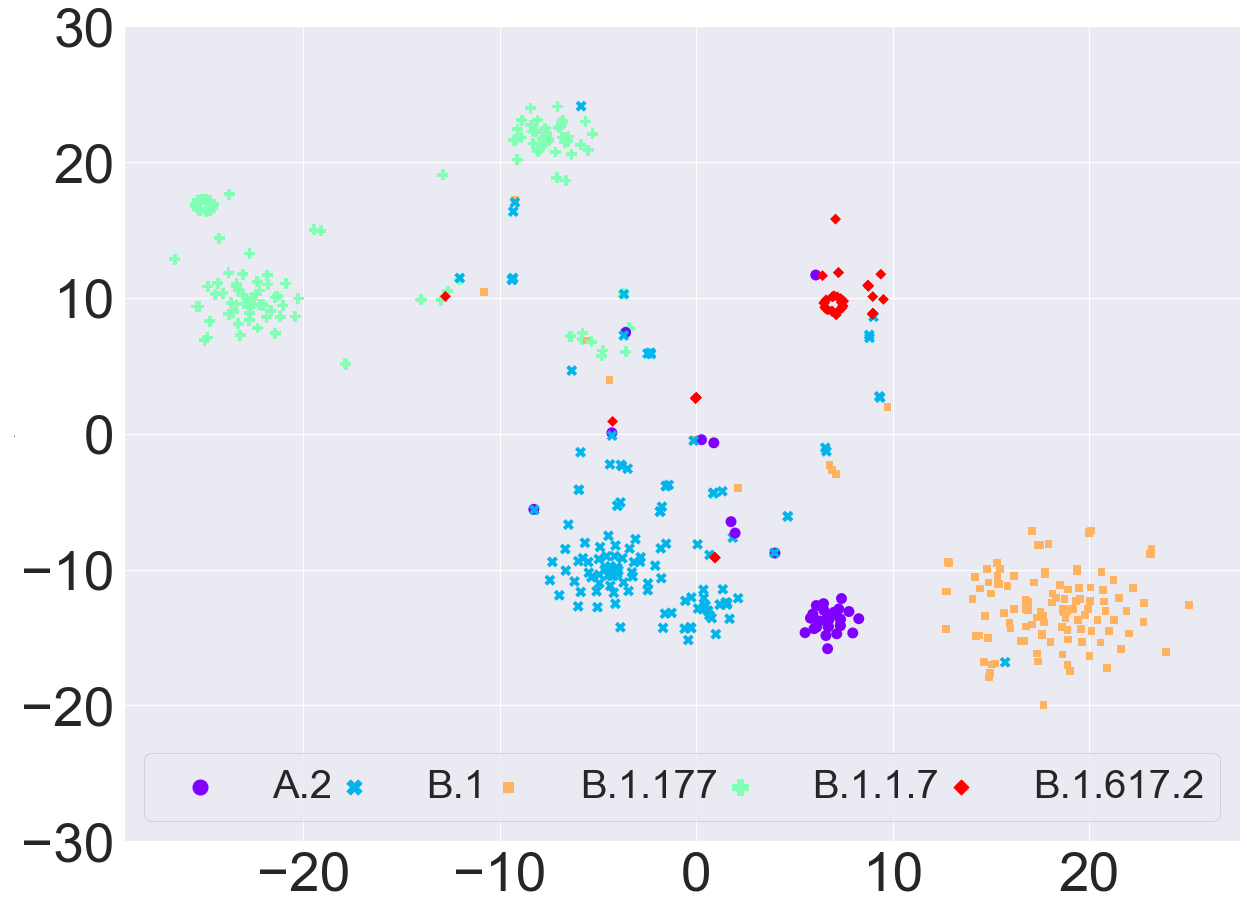

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt # graphs plotting
import matplotlib.cm as cm
import seaborn as sns

# We embed all our sequences into 2D vectors with help of TSNE
X_embedded_orig = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(encoded_seq_reduced)
# X_embedded = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(Ridge_Regression_data)




# az = host_names_new
az = int_variants_name_reduced[:]
# az = month_names_few_final
# X_embedded_orig_final2 = np.array(X_embedded)
X_embedded_orig_final2 = np.array(X_embedded_orig)

colors = cm.rainbow(np.linspace(0, 1, len(np.unique(az))))
len(np.unique(az))

hst = np.unique(az)
order_top_hosts =  az

colors_top_hosts = {hst[0] : colors[0], hst[1] : colors[1],
                      hst[2] : colors[2], hst[3]: colors[3],  
                      hst[4] : colors[4]
}


data_frame_top_hosts = pd.DataFrame({' ': 
                                   np.array(X_embedded_orig_final2[:,0]), 
                           '.': np.array(X_embedded_orig_final2[:,1]), 
                           'Variants:': az})

sns.set(rc={'figure.figsize':(20,15)})

sns.scatterplot(x = ' ', 
            y = '.', 
            hue = 'Variants:', 
            hue_order = order_top_hosts,
#             markers = ordered_markers_top_hosts,
            palette = colors_top_hosts,
            data = data_frame_top_hosts,           
#             legend = 'full',
#             ax = ax12,
            s = 120,
            linewidth=0.01,
            style = 'Variants:')
plt.ylim(-30, 30)
# plt.xlim(-80, 80)
# plt.xlabel("Steps Taken Per Day", fontsize=14)
# plt.ylabel("Calories Burned Per Day", fontsize=14)
plt.tick_params(labelsize=55)
# plt.legend(fontsize=0)
# plt.legend(fontsize=30, mode = "expand", ncol = 5)
# lgnd = plt.legend(loc="lower left", numpoints=1, fontsize=10)

lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=40, mode = "expand", ncol = 5)
for handle in lgnd.legendHandles:
    handle.set_sizes([226.0])

write_path = "variant_onehot_clustering_tnse_plot.png"

plt.savefig(write_path)

In [38]:
X = np.array(encoded_seq_reduced)
y = np.array(int_variants_reduced)

In [39]:
X.shape, len(y), len(X[0])

((556, 713256), 556, 713256)

# Train and Test Data Split

In [63]:
# print("Accuracy   Precision   Recall   F1 (weighted)   F1 (Macro)   F1 (Micro)   ROC AUC")
svm_table = []
gauu_nb_table = []
mlp_table = []
knn_table = []
rf_table = []
lr_table = []
dt_table = []


from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
sss = ShuffleSplit(n_splits=1, test_size=0.3)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# Classifiers

Confusion Matrix NB : 
 [[ 6  5  0  0  0]
 [ 0 38  0  0  0]
 [ 0  5 55  0  0]
 [ 0 25  0 17  0]
 [ 0  8  0  0  8]]
NB Class Wise Accuracy :  [0.54545455 1.         0.91666667 0.4047619  0.5       ]


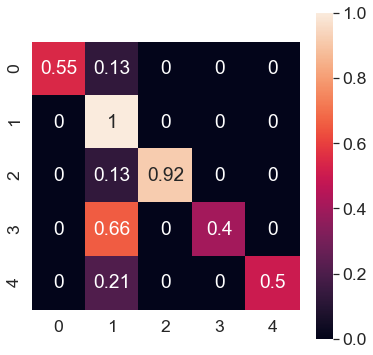

NB Time :  10.660653499995533


In [ ]:
import timeit

start = timeit.default_timer()
gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("NB Time : ", stop - start) 

start = timeit.default_timer()
mlp_return = mlp_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("MLP Time : ", stop - start) 

start = timeit.default_timer()
knn_return = knn_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("KNN Time : ", stop - start) 

start = timeit.default_timer()
rf_return = rf_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("RF Time : ", stop - start) 

start = timeit.default_timer()
lr_return = lr_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("LR Time : ", stop - start) 

start = timeit.default_timer()
dt_return = fun_decision_tree(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("DT Time : ", stop - start) 

start = timeit.default_timer()
svm_return = svm_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("SVM Time : ", stop - start) 

gauu_nb_table.append(gauu_nb_return)
mlp_table.append(mlp_return)
knn_table.append(knn_return)
rf_table.append(rf_return)
lr_table.append(lr_return)
dt_table.append(dt_return)
svm_table.append(svm_return)
     
svm_table_final = DataFrame(svm_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
gauu_nb_table_final = DataFrame(gauu_nb_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
mlp_table_final = DataFrame(mlp_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
knn_table_final = DataFrame(knn_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
rf_table_final = DataFrame(rf_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
lr_table_final = DataFrame(lr_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])


In [ ]:
#taking average of all k-fold performance values
final_mean_mat = []

final_mean_mat.append(np.transpose((list(svm_table_final.mean()))))
final_mean_mat.append(np.transpose((list(gauu_nb_table_final.mean()))))
final_mean_mat.append(np.transpose((list(mlp_table_final.mean()))))
final_mean_mat.append(np.transpose((list(knn_table_final.mean()))))
final_mean_mat.append(np.transpose((list(rf_table_final.mean()))))
final_mean_mat.append(np.transpose((list(lr_table_final.mean()))))
final_mean_mat.append(np.transpose((list(dt_table_final.mean()))))

final_avg_mat = DataFrame(final_mean_mat,columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"], 
                          index=["SVM","NB","MLP","KNN","RF","LR","DT"])

final_avg_mat